# Machine Learning and Data Analysis
----------------------------------------------
### *Session 3.3*


```
10th October, 2023
Anna Pallarès López
Computer Engineering Master's

```



### Generate data

In [1]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# random generator (used to obtain the same random value)

np.random.seed(11)

In [3]:
# define a funtion

def oracle(x):
  #return x
  return x**2
  #return np.abs(np.abs(x-.4)-.2)+x/2-.1 # piecewise
  #return np.sinc(3*x) # exponential function

In [4]:
n = 100
sigma = .01
d = 1

In [5]:
x = np.random.rand(n)
X = np.asarray(np.asmatrix(x).transpose())
y = oracle(x) + sigma*np.random.rand(n)

In [7]:
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asarray(np.asmatrix(xs).transpose())

In [9]:
lam = .1
gam = 10

In [10]:
from sklearn.kernel_ridge import KernelRidge
M = KernelRidge(alpha = lam, kernel = 'rbf', gamma = gam)
M.fit(X,y)
ys = M.predict(Xs)

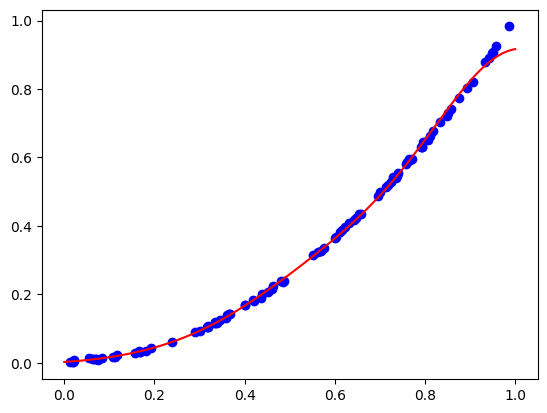

In [11]:
fig, ax= plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')


In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid = {'alpha' : np.logspace(-4,3,30),
        'kernel': ['rbf'],
        'gamma' : np.logspace(-4,3,30)}

MS = GridSearchCV(estimator   = KernelRidge(),
                  param_grid = grid,
                  scoring     = 'neg_mean_absolute_error',
                  cv          = 10)
H = MS.fit(X,y)
M = KernelRidge(alpha  = H.best_params_['alpha'],
                kernel = H.best_params_['kernel'],
                gamma  = H.best_params_['gamma'])
M.fit(X,y)
ys = M.predict(Xs)

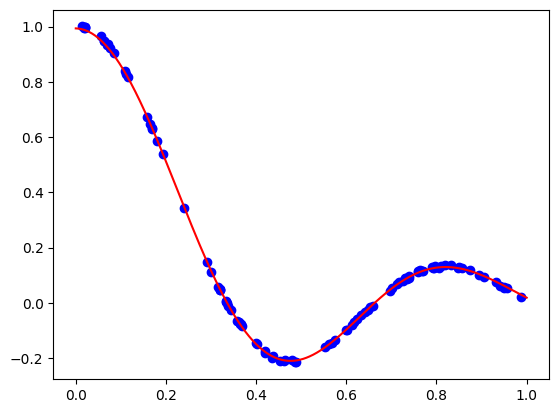

In [ ]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')